In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.metrics import accuracy_score, classification_report
import math

## Training the Multinomial Logistic Regressor, Random Forest Regressor, and Random Forest Classifier with Wellness Data

In [2]:
# Load processed wellness data
df = pd.read_csv("../data/processed/processed_wellness_data.csv")
df.head()

,duration_of_sleep_hours,level_of_physical_activity_minutes_per_day,level_of_stress_scale_110,bmi_category,heart_rate_bpm,systolic_and_diastolic_blood_pressure,nutrition_intake_calories_breakdown_of_nutrients_etc,level_of_workload_scale_110,quality_or_frequency_of_social_interactions,activities_for_mental_health_such_as_therapy_sessions_or_meditation,...,mood_output_encoded,demographic_health_grouping,sleep_health,heart_health,bp_health,lifestyle_grouping,activity_level_grouping,stress_profile_grouping,workload_profile_grouping,social_wellness_grouping
0,7.5,30,5,Normal,72,120/80,2000 calories (balanced diet),6,"Good, frequent",Meditation daily,...,0,HEALTHY_CONSUMPTION,GOOD_SLEEP,GOOD_HEART_RATE,POOR_BLOOD_PRESSURE,NEUTRAL,LIGHTLY_ACTIVE,MEDIUM_STRESS,MEDIUM_WORKLOAD,HIGH_SOCIAL
1,6.8,45,3,Overweight,75,118/78,2500 calories (high in carbs),7,"Moderate, occasional",NaN,...,1,UNHEALTHY_CONSUMPTION,POOR_SLEEP,GOOD_HEART_RATE,GOOD_BLOOD_PRESSURE,NEUTRAL,SOMEWHAT_ACTIVE,LOW_STRESS,MEDIUM_WORKLOAD,MODERATE_SOCIAL
2,8.2,15,8,Underweight,68,115/75,1800 calories (low in protein),9,"Low, infrequent",Therapy sessions weekly,...,2,UNHEALTHY_CONSUMPTION,GOOD_SLEEP,GOOD_HEART_RATE,GOOD_BLOOD_PRESSURE,GOOD,LIGHTLY_ACTIVE,HIGH_STRESS,HIGH_WORKLOAD,MODERATE_SOCIAL
3,7.0,60,4,Normal,70,122/82,2200 calories (healthy diet),5,"Very good, daily",Yoga twice a week,...,0,HEALTHY_CONSUMPTION,GOOD_SLEEP,GOOD_HEART_RATE,POOR_BLOOD_PRESSURE,NEUTRAL,ACTIVE,LOW_STRESS,MEDIUM_WORKLOAD,HIGH_SOCIAL
4,5.5,10,9,Obese,80,130/90,3000 calories (unhealthy),10,"Poor, infrequent",NaN,...,2,UNHEALTHY_CONSUMPTION,POOR_SLEEP,GOOD_HEART_RATE,POOR_BLOOD_PRESSURE,NEUTRAL,SEDENTARY,HIGH_STRESS,HIGH_WORKLOAD,LOW_SOCIAL


#### Cleaning the processed wellness data

In [ ]:
# Cleaning nutrition intake
for i in range(len(df['nutrition_intake_calories_breakdown_of_nutrients_etc'])):
    df.loc[i, 'nutrition_intake_calories_breakdown_of_nutrients_etc'] = df['nutrition_intake_calories_breakdown_of_nutrients_etc'][i].split(" ")[0].replace(",", "")

# Encoding BMI category
encoder_bmi = LabelEncoder()
df['bmi_category_encoded'] = encoder_bmi.fit_transform(df['bmi_category'])

# Cleaning env aspects
for i in range(len(df['environmental_aspects_such_as_weather_and_air_quality'])):
    df.loc[i, 'environmental_aspects_such_as_weather_and_air_quality'] = df['environmental_aspects_such_as_weather_and_air_quality'][i].split(',')[0]

# Encoding cleaned env aspects
encoder_env = LabelEncoder()
df['environmental_aspects_such_as_weather_and_air_quality'] = encoder_env.fit_transform(df['environmental_aspects_such_as_weather_and_air_quality'])

# Converting mood output values
for i in np.where(df["mood_output"] == 'Sad'):
    df.loc[i, "mood_output"] = "Negative"
for i in np.where(df["mood_output"] == 'Happy'):
    df.loc[i, "mood_output"] = "Positive" 

# Encoding mood_output
encoder_mood = LabelEncoder()
df["mood_output_encoded"] = encoder_mood.fit_transform(df["mood_output"])

# Creating quality of sleep column
df['quality_of_sleep_110'] = df['duration_of_sleep_hours']
for i in range(len(df['duration_of_sleep_hours'])):
    df.loc[i, 'quality_of_sleep_110'] = round(df['duration_of_sleep_hours'][i])

df.head().T

,0,1,2,3,4
duration_of_sleep_hours,7.5,6.8,8.2,7.0,5.5
level_of_physical_activity_minutes_per_day,30,45,15,60,10
level_of_stress_scale_110,5,3,8,4,9
bmi_category,Normal,Overweight,Underweight,Normal,Obese
heart_rate_bpm,72,75,68,70,80
systolic_and_diastolic_blood_pressure,120/80,118/78,115/75,122/82,130/90
nutrition_intake_calories_breakdown_of_nutrients_etc,2000,2500,1800,2200,3000
level_of_workload_scale_110,6,7,9,5,10
quality_or_frequency_of_social_interactions,"Good, frequent","Moderate, occasional","Low, infrequent","Very good, daily","Poor, infrequent"
activities_for_mental_health_such_as_therapy_sessions_or_meditation,Meditation daily,NaN,Therapy sessions weekly,Yoga twice a week,NaN


#### Generating the Correlation Matrix

<Axes: >

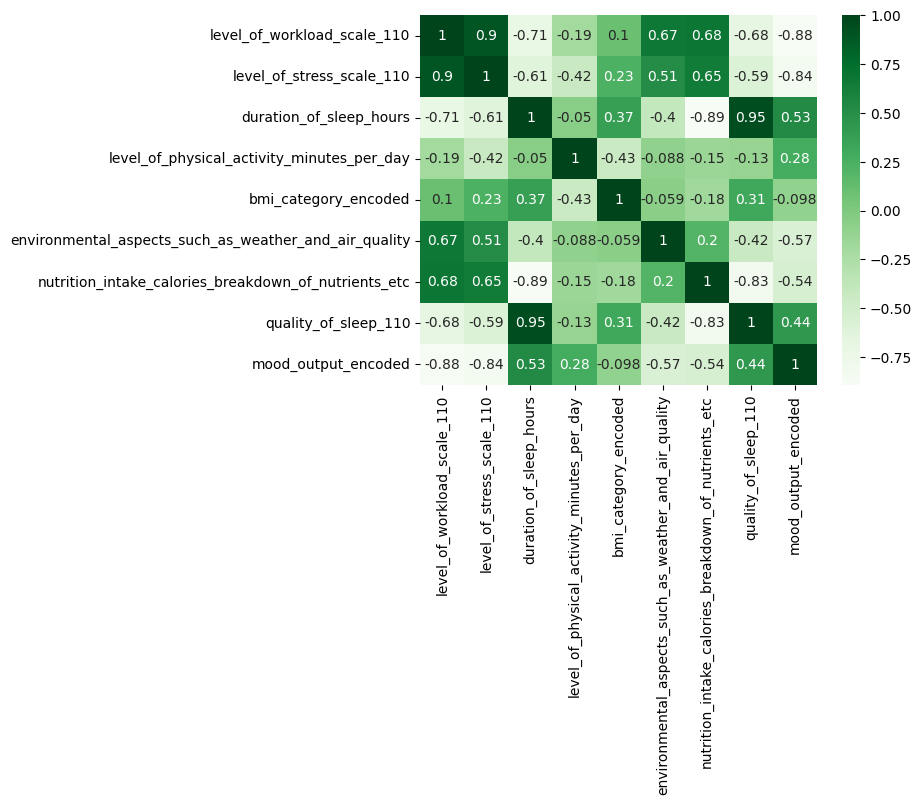

In [4]:
# Selecting columns to general correlation matrix
corr_features = ["level_of_workload_scale_110", "level_of_stress_scale_110", "duration_of_sleep_hours", 
                        "level_of_physical_activity_minutes_per_day", 'bmi_category_encoded', 'environmental_aspects_such_as_weather_and_air_quality'
                , 'nutrition_intake_calories_breakdown_of_nutrients_etc', 'quality_of_sleep_110', 'mood_output_encoded']

corre = df[corr_features].corr()['mood_output_encoded']

testingdf = df[corr_features]
matrix = testingdf.corr()
sns.heatmap(matrix, cmap="Greens", annot=True)

From the correlation matrix, we will initally be using the ["duration_of_sleep_hours", "quality_of_sleep_110", "level_of_physical_activity_minutes_per_day"] as our selected features to train the models since they all possess positive correlation values.

#### Splitting Dataset and Training Multinomial Logistic and Random Forest

In [ ]:
# Spliting the data set into training, validating, and testing data 
selected_features = df[["duration_of_sleep_hours", "quality_of_sleep_110", "level_of_physical_activity_minutes_per_day"]]
selected_target = df["mood_output_encoded"]

X_training, X_rest, y_training, y_rest = train_test_split(selected_features, selected_target, test_size = 0.3, random_state = 42)
X_validating, X_testing, y_validating, y_testing = train_test_split(X_rest, y_rest, test_size = 0.5, random_state = 42)

print("Total number of data:", df.shape[0])
print("Training set:", X_training.shape[0])
print("Validation set:", X_validating.shape[0])
print("Testing set:", X_testing.shape[0])

Total number of data: 737
Training set: 515
Validation set: 111
Testing set: 111


In [ ]:
Mul_Norm_LogReg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000)

Mul_Norm_LogReg.fit(X_training, y_training)

Training Done


c:\Users\Josue\CS-GY-6923 Machine Learning\synap-well\synap-well\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
rand_for = RandomForestRegressor(random_state = 42)
rand_for = OneVsRestClassifier(rand_for)

rand_for.fit(X_training, y_training)

Training Done


In [9]:
rand_for_classifier = RandomForestClassifier(random_state = 42)

rand_for_classifier.fit(X_training, y_training)
print("Training Done")

Training Done


#### Visualizing Validation with Validating Data

In [10]:
# Validation
Mul_Norm_vali_pred = Mul_Norm_LogReg.predict(X_validating)
rand_for_vali_pred = rand_for.predict(X_validating)
rand_for_class_vali_pred = rand_for_classifier.predict(X_validating)

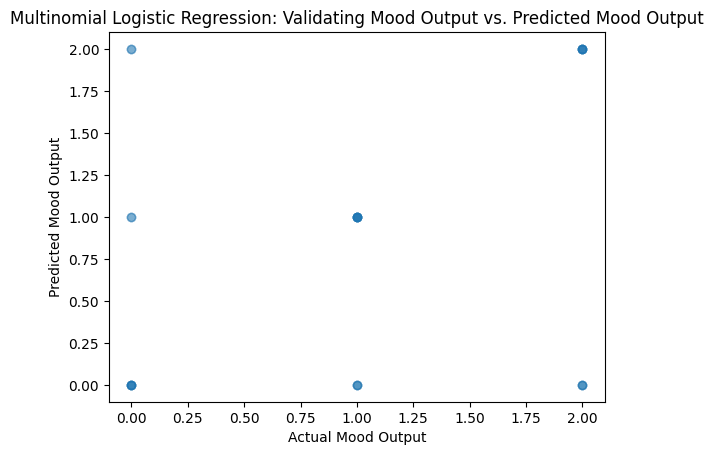

In [11]:
plt.scatter(y_validating, y = Mul_Norm_vali_pred, alpha = 0.1)
plt.title("Multinomial Logistic Regression: Validating Mood Output vs. Predicted Mood Output")
plt.xlabel("Actual Mood Output")
plt.ylabel("Predicted Mood Output")
plt.show()

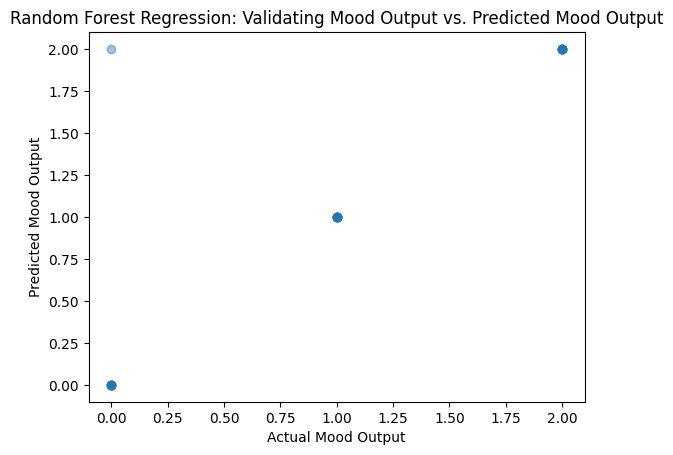

In [12]:
plt.scatter(y_validating, y = rand_for_vali_pred, alpha = 0.1)
plt.title("Random Forest Regression: Validating Mood Output vs. Predicted Mood Output")
plt.xlabel("Actual Mood Output")
plt.ylabel("Predicted Mood Output")
plt.show()

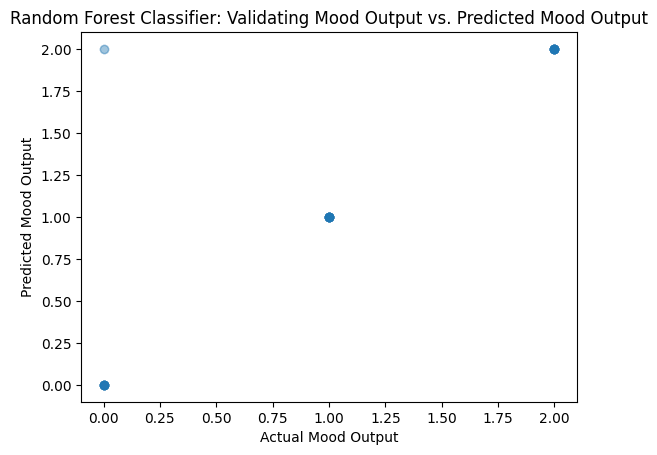

In [13]:
plt.scatter(y_validating, y = rand_for_class_vali_pred, alpha = 0.1)
plt.title("Random Forest Classifier: Validating Mood Output vs. Predicted Mood Output")
plt.xlabel("Actual Mood Output")
plt.ylabel("Predicted Mood Output")
plt.show()

#### Evaluating Regressors and Classifier with Testing Data

In [14]:
Mul_Norm_test_pred = Mul_Norm_LogReg.predict(X_testing)
rand_for_test_pred = rand_for.predict(X_testing)
rand_for_class_test_pred = rand_for_classifier.predict(X_testing)

Mul_Norm_MAE = MAE(y_testing, Mul_Norm_test_pred)
Mul_Norm_MSE = MSE(y_testing, Mul_Norm_test_pred)
Mul_Norm_R2 = R2(y_testing, Mul_Norm_test_pred)

rand_for_MAE = MAE(y_testing, rand_for_test_pred)
rand_for_MSE = MSE(y_testing, rand_for_test_pred)
rand_for_R2 = R2(y_testing, rand_for_test_pred)

rand_for_class_report = classification_report(y_testing, rand_for_class_test_pred)

print("Multinomial Logistic Regression:")
print("Mean Absolute Error:", Mul_Norm_MAE)
print("Mean Square Error:", Mul_Norm_MSE)
print("R-2 Score:", Mul_Norm_R2)
print("Prediction Accuracy:", accuracy_score(y_testing, Mul_Norm_test_pred))
print()
print("Random Forest Regression:")
print("Mean Absolute Error:", rand_for_MAE)
print("Mean Square Error:", rand_for_MSE)
print("R-2 Score:", rand_for_R2)
print("Prediction Accuracy:", accuracy_score(y_testing, rand_for_test_pred))
print()
print("Random Forest Classification Report:")
print(rand_for_class_report)

Multinomial Logistic Regression:
Mean Absolute Error: 0.6846846846846847
Mean Square Error: 1.1891891891891893
R-2 Score: -0.6563418494234683
Prediction Accuracy: 0.5675675675675675

Random Forest Regression:
Mean Absolute Error: 0.12612612612612611
Mean Square Error: 0.25225225225225223
R-2 Score: 0.6486547592132037
Prediction Accuracy: 0.9369369369369369

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        49
           1       1.00      1.00      1.00        29
           2       0.82      1.00      0.90        33

    accuracy                           0.94       111
   macro avg       0.94      0.95      0.94       111
weighted avg       0.95      0.94      0.94       111



Analyzing the error and R2 score values, we see that the random forest regressor and random forest classifier are performing well on predicting the test wellness data. However, the multinomial logistic regressor was struggling with its prediction as noted by its accuracy of 57%. On the other hand, the random forest regressor predicted the mood output with 94% accuracy with a 0.64 R2 score, which performed well and would primarily not constitute a need to worry about overfitting.

Even so, the possibility still exists and could raise some concern of overfitting for the random forest regressor and classifier for the size of the training data is too small (310); due to the performance amplifying characteristics of random forest models such as boosting, the random forest regressor and classifier could fit too well with the data trend and complexity in the small size of training data. 

Thus, we will perform the data augmentation on the wellness_data to increase the size of the data to 1400 rows and train the same models again.

## Training the Multinomial Logistic Regressor, Random Forest Regressor, and Random Forest Classifier with Augmented Wellness Data

In [15]:
# Load augmented wellness data
df_aug = pd.read_csv("../data/processed/Augmented_Wellness_Dataset.csv")
df_aug.head()

,level_of_workload_scale_110,level_of_stress_scale_110,duration_of_sleep_hours,level_of_physical_activity_minutes_per_day,environmental_aspects_such_as_weather_and_air_quality,nutrition_intake_calories_breakdown_of_nutrients_etc,mood_output
0,6.0,5.0,7.5,30.0,"Sunny, good air quality",2000 calories (balanced diet),Happy
1,7.0,3.0,6.8,45.0,"Rainy, poor air quality",2500 calories (high in carbs),Neutral
2,9.0,8.0,8.2,15.0,"Sunny, good air quality",1800 calories (low in protein),Sad
3,5.0,4.0,7.0,60.0,"Cloudy, moderate air quality",2200 calories (healthy diet),Happy
4,10.0,9.0,5.5,10.0,"Sunny, good air quality",3000 calories (unhealthy),Sad


In [16]:
# Check rows of the augmented data
df_aug.shape[0]

1400

#### Cleaning the augmented wellness data

In [17]:
# Cleaning nutrition intake
for i in range(len(df_aug['nutrition_intake_calories_breakdown_of_nutrients_etc'])):
    df_aug.loc[i, 'nutrition_intake_calories_breakdown_of_nutrients_etc'] = df_aug['nutrition_intake_calories_breakdown_of_nutrients_etc'][i].split(" ")[0].replace(",", "")

# Cleaning env aspects
for i in range(len(df_aug['environmental_aspects_such_as_weather_and_air_quality'])):
    df_aug.loc[i, 'environmental_aspects_such_as_weather_and_air_quality'] = df_aug['environmental_aspects_such_as_weather_and_air_quality'][i].split(',')[0]

# Encoding cleaned env aspects
df_aug['environmental_aspects_such_as_weather_and_air_quality'] = encoder_env.transform(df_aug['environmental_aspects_such_as_weather_and_air_quality'])

# Converting mood output values
for i in np.where(df_aug["mood_output"] == 'Sad'):
    df_aug.loc[i, "mood_output"] = "Negative"
for i in np.where(df_aug["mood_output"] == 'Happy'):
    df_aug.loc[i, "mood_output"] = "Positive" 

# Encoding mood_output
df_aug["mood_output_encoded"] = encoder_mood.transform(df_aug["mood_output"])

# Creating quality of sleep column
df_aug['quality_of_sleep_110'] = df_aug['duration_of_sleep_hours']
for i in range(len(df_aug['duration_of_sleep_hours'])):
    df_aug.loc[i, 'quality_of_sleep_110'] = math.ceil(df_aug['duration_of_sleep_hours'][i])

# Remove any data point with NaN
if df_aug.isnull().any().any():
    df_aug = df_aug.dropna()

df_aug.head()

,level_of_workload_scale_110,level_of_stress_scale_110,duration_of_sleep_hours,level_of_physical_activity_minutes_per_day,environmental_aspects_such_as_weather_and_air_quality,nutrition_intake_calories_breakdown_of_nutrients_etc,mood_output,mood_output_encoded,quality_of_sleep_110
0,6.0,5.0,7.5,30.0,2,2000,Positive,2,8.0
1,7.0,3.0,6.8,45.0,1,2500,Neutral,1,7.0
2,9.0,8.0,8.2,15.0,2,1800,Negative,0,9.0
3,5.0,4.0,7.0,60.0,0,2200,Positive,2,7.0
4,10.0,9.0,5.5,10.0,2,3000,Negative,0,6.0


#### Generating the Correlation Matrix

<Axes: >

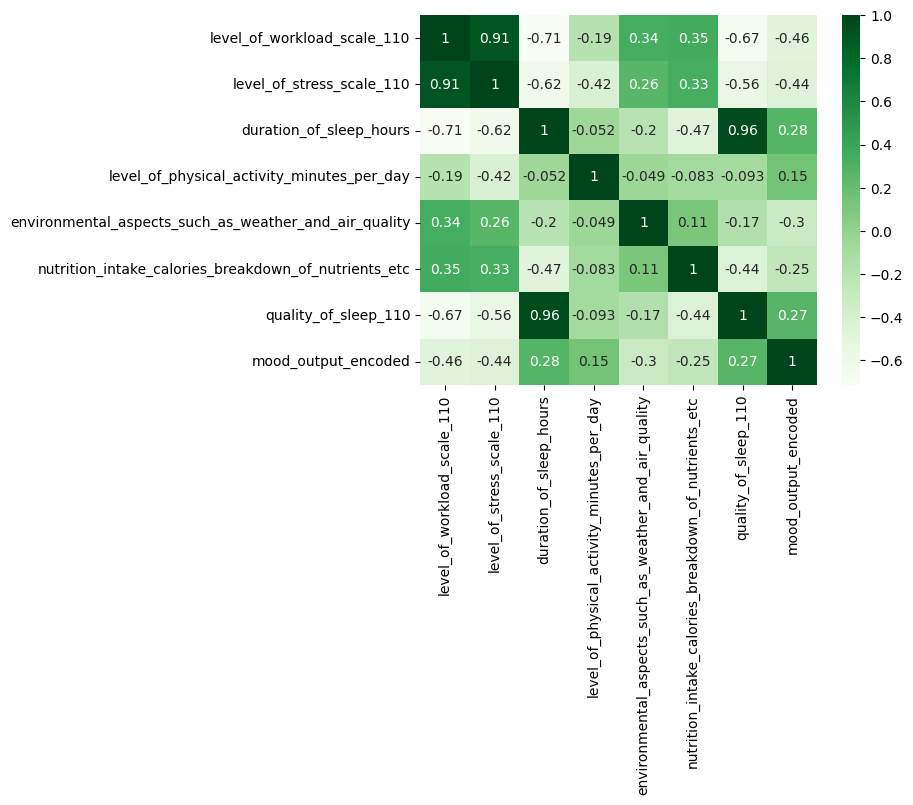

In [18]:
corr_features = ["level_of_workload_scale_110", "level_of_stress_scale_110", "duration_of_sleep_hours", 
                        "level_of_physical_activity_minutes_per_day", 'environmental_aspects_such_as_weather_and_air_quality'
                , 'nutrition_intake_calories_breakdown_of_nutrients_etc', 'quality_of_sleep_110', 'mood_output_encoded']

corre = df_aug[corr_features].corr()['mood_output_encoded']

testingdf = df_aug[corr_features]
matrix = testingdf.corr()
sns.heatmap(matrix, cmap="Greens", annot=True)

#### Splitting Dataset and Training Multinomial Logistic and Random Forest

In [20]:
selected_features_aug = df_aug[["duration_of_sleep_hours", "quality_of_sleep_110", "level_of_physical_activity_minutes_per_day"]]
target_aug = df_aug["mood_output_encoded"]

X_train, X_rest_aug, y_train, y_rest_aug = train_test_split(selected_features_aug, target_aug, test_size = 0.2, random_state = 42)
X_validate, X_test, y_validate, y_test = train_test_split(X_rest_aug, y_rest_aug, test_size = 0.5, random_state = 42)

print("Total number of data:", df_aug.shape[0])
print("Training set:", X_train.shape[0])
print("Validation set:", X_validate.shape[0])
print("Testing set:", X_test.shape[0])

Total number of data: 1400
Training set: 1120
Validation set: 140
Testing set: 140


In [21]:
MultiLog_Reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000)
RF_Reg = RandomForestRegressor(random_state = 42)
RF_Reg = OneVsRestClassifier(RF_Reg)
RF_Class = RandomForestClassifier(random_state = 42)

MultiLog_Reg.fit(X_train, y_train)
RF_Reg.fit(X_train, y_train)
RF_Class.fit(X_train, y_train)
print("Training Done")

c:\Users\Josue\CS-GY-6923 Machine Learning\synap-well\synap-well\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Done


#### Evaluating Regressors and Classifier with Testing Data

In [23]:
ML_test_pred = MultiLog_Reg.predict(X_test)
RF_Reg_test_pred = RF_Reg.predict(X_test)
RF_class_test_pred = RF_Class.predict(X_test)

ML_MAE = MAE(y_test, ML_test_pred)
ML_MSE = MSE(y_test, ML_test_pred)
ML_R2 = R2(y_test, ML_test_pred)

RF_MAE = MAE(y_test, RF_Reg_test_pred)
RF_MSE = MSE(y_test, RF_Reg_test_pred)
RF_R2 = R2(y_test, RF_Reg_test_pred)

RF_class_report = classification_report(y_test, RF_class_test_pred)

print("Multinomial Logistic Regression:")
print("Mean Absolute Error:", ML_MAE)
print("Mean Square Error:", ML_MSE)
print("R-2 Score:", ML_R2)
print("Prediction Accuracy:", accuracy_score(y_test, ML_test_pred))
print()
print("Random Forest Regression:")
print("Mean Absolute Error:", RF_MAE)
print("Mean Square Error:", RF_MSE)
print("R-2 Score:", RF_R2)
print("Prediction Accuracy:", accuracy_score(y_test, RF_Reg_test_pred))
print()
print("Random Forest Classification report:")
print(RF_class_report)

Multinomial Logistic Regression:
Mean Absolute Error: 0.7642857142857142
Mean Square Error: 1.1357142857142857
R-2 Score: -0.6421984507561789
Prediction Accuracy: 0.42142857142857143

Random Forest Regression:
Mean Absolute Error: 0.4857142857142857
Mean Square Error: 0.8
R-2 Score: -0.1567687200295096
Prediction Accuracy: 0.6714285714285714

Random Forest Classification report:
              precision    recall  f1-score   support

           0       0.66      0.65      0.65        51
           1       0.70      0.65      0.67        43
           2       0.64      0.70      0.67        46

    accuracy                           0.66       140
   macro avg       0.67      0.66      0.66       140
weighted avg       0.67      0.66      0.66       140



## Testing the Trained Models with Tracker Log Dataset

To test if the trained regressors and classifier would perform prediction well with the actual user data, we recorded our own data and will test the prediction with the trained models.

In [27]:
testDf = pd.read_csv("../data/raw/CS-GY-6923 Log Tracker  - Daily Questions.csv")

testDf.head()

,Date,Duration of Sleep (hours),Quality of Sleep (1-10),Daily Weigh-in,BMI Category,"Nutrition Intake (calories, breakdown of nutrients, etc.)",Level of Physical Activity (minutes per day),Heart Rate (bpm),Systolic and Diastolic Blood Pressure,Level of Stress (scale: 1–10),Level of Workload (scale: 1–10),Environmental Aspects (such as weather and air quality),"Additional health indicators (e.g., water levels, steps)",Mood Output,Notes
0,03/14/2025,4,5,126.5,Normal,1750 Calories (Balanced),60,71,117/55,6,5,"Sunny, Good Air Quality","1.5 Liter, 1000 Steps",Negative,"Barely had any sleep, feeling terrible"
1,03/15/2025,5,5,126.0,Normal,1700 Calories (Balanced),20,69,114/53,5,4,"Cloudy, Good Air Quality","1.25 Liter, 2105 Steps",Neutral,Regular day
2,03/16/2025,6,6,125.6,Normal,1800 Calories (High in Protein),75,68,111/51,3,4,"Cloudy, Good Air Quality","1 Liter, 8851 Steps",Positive,"Went out for a long jog, I enjoyed it"
3,03/17/2025,6,6,126.2,Normal,"1900 Calories (High in Carbs, Balanced)",80,70,102/55,2,4,"Cloudy, Good Air Quality","0.75 Liter, 2251 Steps",Positive,"Went out for a short jog and lifted weights, i..."
4,03/18/2025,7,7,126.8,Normal,"1760 Calories (Low in Protein, Healthy)",90,67,118/53,3,3,"Sunny, Good Air Quality","0.85 Liter, 11080 Steps",Positive,"Went out for a long jog, good weather, it was ..."


#### Cleaning the Tracker Log Data

In [ ]:
# Rename columns as the ones in the wellness data
testDf = testDf.rename(columns={'Quality of Sleep  (1-10)': 'quality_of_sleep_110',
                          'Level of Stress (scale: 1–10)': "level_of_stress_scale_110",
                          'Level of Workload (scale: 1–10)': "level_of_workload_scale_110",
                          'Duration of Sleep (hours)': "duration_of_sleep_hours",
                            'Level of Physical Activity (minutes per day)': "level_of_physical_activity_minutes_per_day",
                            'Nutrition Intake (calories, breakdown of nutrients, etc.)': 'nutrition_intake_calories_breakdown_of_nutrients_etc',
                            'Environmental Aspects (such as weather and air quality)': 'environmental_aspects_such_as_weather_and_air_quality',
                             'Mood Output': "mood_output"})

# To follow some data trend in the wellness data, keep the range of the label of physical activity  from 0 to 60
# for i in np.where(testDf["level_of_physical_activity_minutes_per_day"] > 60)[0]:
#     testDf.loc[i, "level_of_physical_activity_minutes_per_day"] = 60

# Cleaning nutrition intake
for i in range(len(testDf['nutrition_intake_calories_breakdown_of_nutrients_etc'])):
    testDf.loc[i, 'nutrition_intake_calories_breakdown_of_nutrients_etc'] = testDf['nutrition_intake_calories_breakdown_of_nutrients_etc'][i].split(" ")[0].replace(",", "")

# Cleaning env aspects
for i in range(len(testDf['environmental_aspects_such_as_weather_and_air_quality'])):
    testDf.loc[i, 'environmental_aspects_such_as_weather_and_air_quality'] = testDf['environmental_aspects_such_as_weather_and_air_quality'][i].split(',')[0]

# Encoding cleaned env aspects
testDf['environmental_aspects_such_as_weather_and_air_quality'] = encoder_env.transform(testDf['environmental_aspects_such_as_weather_and_air_quality'])

# Converting mood output values
for i in np.where(testDf["mood_output"] == 'Sad'):
    testDf.loc[i, "mood_output"] = "Negative"
for i in np.where(testDf["mood_output"] == 'Happy'):
    testDf.loc[i, "mood_output"] = "Positive" 

# Encoding mood_output
testDf["mood_output_encoded"] = encoder_mood.transform(testDf["mood_output"])

# Remove any data point with NaN
if testDf.isnull().any().any():
    testDf = testDf.dropna()

testDf.head()

,Date,duration_of_sleep_hours,quality_of_sleep_110,Daily Weigh-in,BMI Category,nutrition_intake_calories_breakdown_of_nutrients_etc,level_of_physical_activity_minutes_per_day,Heart Rate (bpm),Systolic and Diastolic Blood Pressure,level_of_stress_scale_110,level_of_workload_scale_110,environmental_aspects_such_as_weather_and_air_quality,"Additional health indicators (e.g., water levels, steps)",mood_output,Notes,mood_output_encoded
0,03/14/2025,4,5,126.5,Normal,1750,60,71,117/55,6,5,2,"1.5 Liter, 1000 Steps",Negative,"Barely had any sleep, feeling terrible",0
1,03/15/2025,5,5,126.0,Normal,1700,20,69,114/53,5,4,0,"1.25 Liter, 2105 Steps",Neutral,Regular day,1
2,03/16/2025,6,6,125.6,Normal,1800,75,68,111/51,3,4,0,"1 Liter, 8851 Steps",Positive,"Went out for a long jog, I enjoyed it",2
3,03/17/2025,6,6,126.2,Normal,1900,80,70,102/55,2,4,0,"0.75 Liter, 2251 Steps",Positive,"Went out for a short jog and lifted weights, i...",2
4,03/18/2025,7,7,126.8,Normal,1760,90,67,118/53,3,3,2,"0.85 Liter, 11080 Steps",Positive,"Went out for a long jog, good weather, it was ...",2


#### Generating the Correlation Matrix

<Axes: >

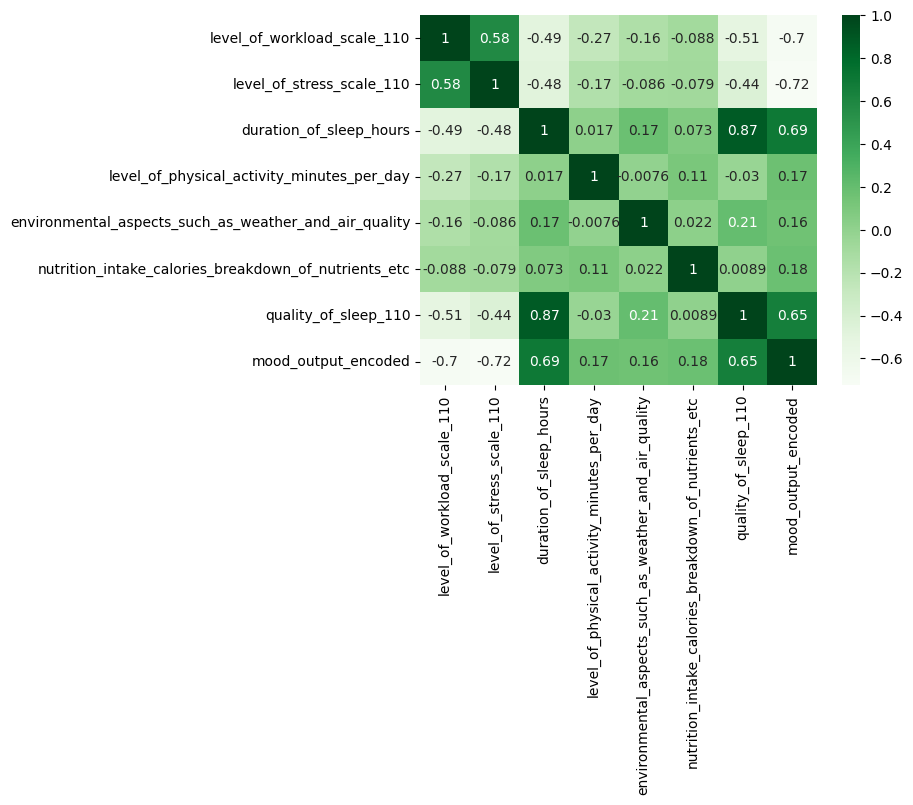

In [29]:
corr_features = ["level_of_workload_scale_110", "level_of_stress_scale_110", "duration_of_sleep_hours", 
                        "level_of_physical_activity_minutes_per_day", 'environmental_aspects_such_as_weather_and_air_quality'
                , 'nutrition_intake_calories_breakdown_of_nutrients_etc', 'quality_of_sleep_110', 'mood_output_encoded']

corre = testDf[corr_features].corr()['mood_output_encoded']

testingdf = testDf[corr_features]
matrix = testingdf.corr()
sns.heatmap(matrix, cmap="Greens", annot=True)

#### Evaluating Prediction of Regressors and Classifier Trained with Augmented Wellness Data on Activity Log Tracker Data

In [35]:
features_test = ["duration_of_sleep_hours", "quality_of_sleep_110", "level_of_physical_activity_minutes_per_day"]
target_test = ["mood_output_encoded"]

features_logTest = testDf[features_test]
target_logTest = testDf[target_test]

ML_tracker_pred = MultiLog_Reg.predict(features_logTest)
RF_tracker_pred = RF_Reg.predict(features_logTest)
RF_tracker_class_pred = RF_Class.predict(features_logTest)

ML_tracker_MAE = MAE(target_logTest, ML_tracker_pred)
ML_tracker_MSE = MSE(target_logTest, ML_tracker_pred)
ML_tracker_R2 = R2(target_logTest, ML_tracker_pred)

RF_tracker_MAE = MAE(target_logTest, RF_tracker_pred)
RF_tracker_MSE = MSE(target_logTest, RF_tracker_pred)
RF_tracker_R2 = R2(target_logTest, RF_tracker_pred)

RF_tracker_report = classification_report(target_logTest, RF_tracker_class_pred)

print("Multinomial Logistic Regression:")
print("Mean Absolute Error:", ML_tracker_MAE)
print("Mean Square Error:", ML_tracker_MSE)
print("R-2 Score:", ML_tracker_R2)
print("Accuracy:", accuracy_score(target_logTest, ML_tracker_pred))
print()
print("Random Forest Regression:")
print("Mean Absolute Error:", RF_tracker_MAE)
print("Mean Square Error:", RF_tracker_MSE)
print("R-2 Score:", RF_tracker_R2)
print("Accuracy:", accuracy_score(target_logTest, RF_tracker_pred))
print()
print("Random Forest Classifier Report:")
print(RF_tracker_report)

Multinomial Logistic Regression:
Mean Absolute Error: 1.1176470588235294
Mean Square Error: 1.7058823529411764
R-2 Score: -2.04320987654321
Accuracy: 0.17647058823529413

Random Forest Regression:
Mean Absolute Error: 1.1176470588235294
Mean Square Error: 1.8235294117647058
R-2 Score: -2.2530864197530867
Accuracy: 0.23529411764705882

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.14      0.17      0.15         6
           1       0.27      0.33      0.30        12
           2       0.50      0.38      0.43        16

    accuracy                           0.32        34
   macro avg       0.30      0.29      0.29        34
weighted avg       0.35      0.32      0.33        34



#### Evaluating Prediction of Regressors and Classifier Trained with Processed Wellness Data on Activity Log Tracker Data

In [36]:
ML_tracker_pred2 = Mul_Norm_LogReg.predict(features_logTest)
RF_tracker_pred2 = rand_for.predict(features_logTest)
rand_for_class_test_pred2 = rand_for_classifier.predict(features_logTest)

ML_tracker_MAE2 = MAE(target_logTest, ML_tracker_pred2)
ML_tracker_MSE2 = MSE(target_logTest, ML_tracker_pred2)
ML_tracker_R2_2 = R2(target_logTest, ML_tracker_pred2)

RF_tracker_MAE2 = MAE(target_logTest, RF_tracker_pred2)
RF_tracker_MSE2 = MSE(target_logTest, RF_tracker_pred2)
RF_tracker_R2_2 = R2(target_logTest, RF_tracker_pred2)

RF_tracker_report2 = classification_report(target_logTest, rand_for_class_test_pred2)

print("Multinomial Logistic Regression:")
print("Mean Absolute Error:", ML_tracker_MAE2)
print("Mean Square Error:", ML_tracker_MSE2)
print("R-2 Score:", ML_tracker_R2_2)
print("Accuracy:", accuracy_score(target_logTest, ML_tracker_pred2))
print()
print()
print("Random Forest Regression:")
print("Mean Absolute Error:", RF_tracker_MAE2)
print("Mean Square Error:", RF_tracker_MSE2)
print("R-2 Score:", RF_tracker_R2_2)
print("Accuracy:", accuracy_score(target_logTest, RF_tracker_pred2))
print()
print("Random Forest Classifier Report:")
print(RF_tracker_report2)

Multinomial Logistic Regression:
Mean Absolute Error: 1.088235294117647
Mean Square Error: 1.6764705882352942
R-2 Score: -1.990740740740741
Accuracy: 0.20588235294117646


Random Forest Regression:
Mean Absolute Error: 1.0
Mean Square Error: 1.6470588235294117
R-2 Score: -1.9382716049382718
Accuracy: 0.3235294117647059

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.18      1.00      0.31         6
           1       0.00      0.00      0.00        12
           2       1.00      0.06      0.12        16

    accuracy                           0.21        34
   macro avg       0.39      0.35      0.14        34
weighted avg       0.50      0.21      0.11        34



c:\Users\Josue\CS-GY-6923 Machine Learning\synap-well\synap-well\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Josue\CS-GY-6923 Machine Learning\synap-well\synap-well\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Josue\CS-GY-6923 Machine Learning\synap-well\synap-well\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

So as observed above, the performance of our models when training and employing these three features ["duration_of_sleep_hours", "quality_of_sleep_110", "level_of_physical_activity_minutes_per_day"] was substantially lower than expected.

As such, we decided to pivot and utilize more of a logical intuitive approach when selecting our features. With our intuition guiding us, we decided to utilize the features ["duration_of_sleep_hours", "quality_of_sleep_110", "level_of_stress_scale_110", "level_of_workload_scale_110"], as our designated features to train our models based on their magnitude values of those features with respect to both positive and negative side of the correlation matrix spectrum. 

To elaborate, we chose the top 2 features on each side of the correlation magnitude spectrum to maximize the correlation classification impact of the model(s).

In [37]:
# Processed Wellness Dataset
# Spliting the data set into training, validating, and testing data (Original)
selected_features = df[["duration_of_sleep_hours", "quality_of_sleep_110", "level_of_stress_scale_110", 
                                "level_of_workload_scale_110"]]
selected_target = df["mood_output_encoded"]

X_training, X_rest, y_training, y_rest = train_test_split(selected_features, selected_target, test_size = 0.3, random_state = 42)
X_validating, X_testing, y_validating, y_testing = train_test_split(X_rest, y_rest, test_size = 0.5, random_state = 42)

print("Total number of data:", df.shape[0])
print("Training set:", X_training.shape[0])
print("Validation set:", X_validating.shape[0])
print("Testing set:", X_testing.shape[0])

Total number of data: 737
Training set: 515
Validation set: 111
Testing set: 111


In [38]:
Mul_Norm_LogReg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000)
Mul_Norm_LogReg.fit(X_training, y_training)

rand_for = RandomForestRegressor(random_state = 42)
rand_for = OneVsRestClassifier(rand_for)
rand_for.fit(X_training, y_training)

rand_for_classifier = RandomForestClassifier(random_state = 42)
rand_for_classifier.fit(X_training, y_training)

print("Training Done")

c:\Users\Josue\CS-GY-6923 Machine Learning\synap-well\synap-well\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Done


In [39]:
# Validation
Mul_Norm_vali_pred = Mul_Norm_LogReg.predict(X_validating)
rand_for_vali_pred = rand_for.predict(X_validating)
rand_for_class_vali_pred = rand_for_classifier.predict(X_validating)

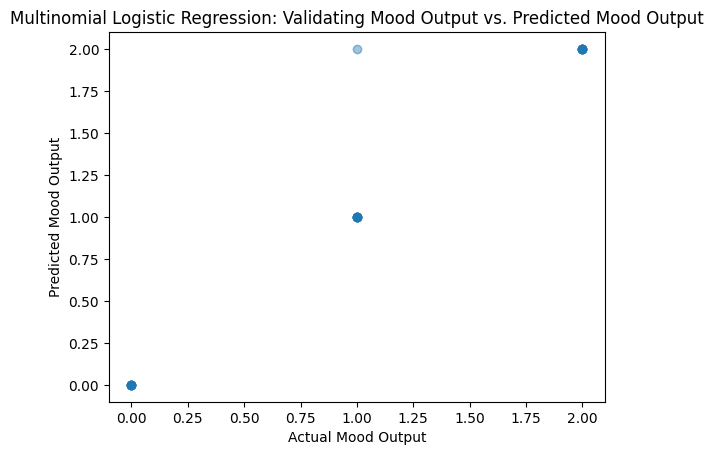

In [54]:
plt.scatter(y_validating, y = Mul_Norm_vali_pred, alpha = 0.1)
plt.title("Multinomial Logistic Regression: Validating Mood Output vs. Predicted Mood Output")
plt.xlabel("Actual Mood Output")
plt.ylabel("Predicted Mood Output")
plt.show()

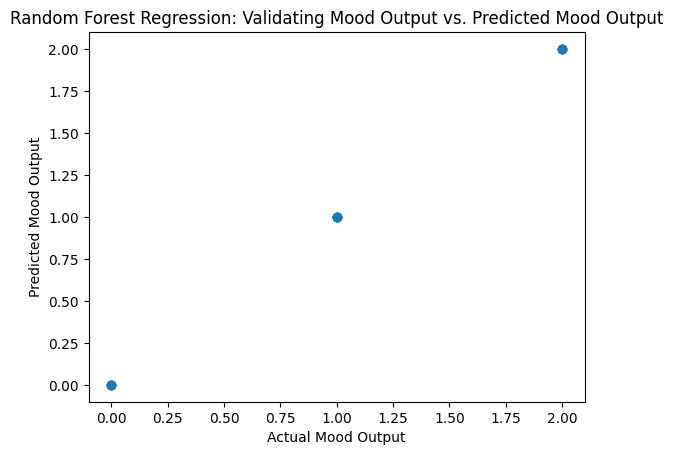

In [55]:
plt.scatter(y_validating, y = rand_for_vali_pred, alpha = 0.1)
plt.title("Random Forest Regression: Validating Mood Output vs. Predicted Mood Output")
plt.xlabel("Actual Mood Output")
plt.ylabel("Predicted Mood Output")
plt.show()

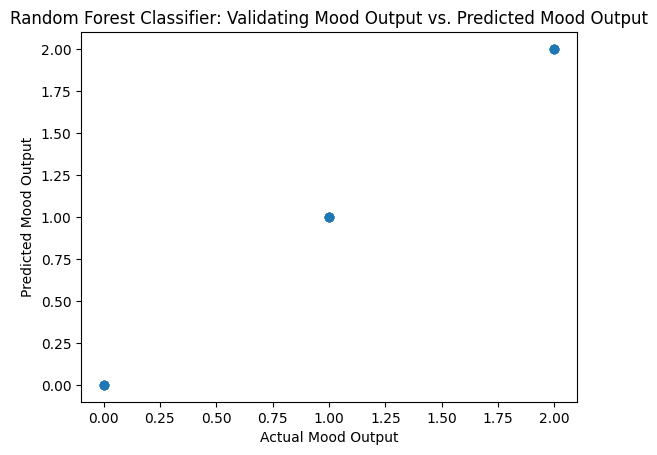

In [56]:
plt.scatter(y_validating, y = rand_for_class_vali_pred, alpha = 0.1)
plt.title("Random Forest Classifier: Validating Mood Output vs. Predicted Mood Output")
plt.xlabel("Actual Mood Output")
plt.ylabel("Predicted Mood Output")
plt.show()

In [40]:
Mul_Norm_test_pred = Mul_Norm_LogReg.predict(X_testing)
rand_for_test_pred = rand_for.predict(X_testing)
rand_for_class_test_pred = rand_for_classifier.predict(X_testing)

Mul_Norm_MAE = MAE(y_testing, Mul_Norm_test_pred)
Mul_Norm_MSE = MSE(y_testing, Mul_Norm_test_pred)
Mul_Norm_R2 = R2(y_testing, Mul_Norm_test_pred)

rand_for_MAE = MAE(y_testing, rand_for_test_pred)
rand_for_MSE = MSE(y_testing, rand_for_test_pred)
rand_for_R2 = R2(y_testing, rand_for_test_pred)

rand_for_class_report = classification_report(y_testing, rand_for_class_test_pred)

print("Multinomial Logistic Regression:")
print("Mean Absolute Error:", Mul_Norm_MAE)
print("Mean Square Error:", Mul_Norm_MSE)
print("R-2 Score:", Mul_Norm_R2)
print("Prediction Accuracy:", accuracy_score(y_testing, Mul_Norm_test_pred))
print()
print("Random Forest Regression:")
print("Mean Absolute Error:", rand_for_MAE)
print("Mean Square Error:", rand_for_MSE)
print("R-2 Score:", rand_for_R2)
print("Accuracy:", accuracy_score(y_testing, rand_for_test_pred))
print()
print("Random Forest Classification Report:")
print(rand_for_class_report)

Multinomial Logistic Regression:
Mean Absolute Error: 0.07207207207207207
Mean Square Error: 0.07207207207207207
R-2 Score: 0.8996156454894868
Prediction Accuracy: 0.9279279279279279

Random Forest Regression:
Mean Absolute Error: 0.0
Mean Square Error: 0.0
R-2 Score: 1.0
Accuracy: 1.0

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        33

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111



Analyzing the error and R2 score values, we see that all the multinomial logistic regressor, random forest regressor, and random forest classifier are performing well on predicting the testing wellness data. However, while the multinomial logistic regressor predicted the mood output with 94% accuracy with 0.93 R2 score, which performed well and would not need to worry for overfitting. 

However, the random forest regressor and classifier predicted the mood output perfectly. This could raise some concern of overfitting for the random forest regressor and classifier for the size of the training data was too small (310); due to the characteristic of the random forest models such as boosting, the random forest regressor and classifier could fit too well with the data trend and complexity in the small size of training data. Thus, we will perform the data augmentation on the wellness_data to increase the size of the data to 1400 rows and train the same models again.

In [41]:
# Augmented Wellness Dataset
selected_features_aug = df_aug[["duration_of_sleep_hours", "quality_of_sleep_110", "level_of_stress_scale_110", 
                                "level_of_workload_scale_110"]]
target_aug = df_aug["mood_output_encoded"]

X_train, X_rest_aug, y_train, y_rest_aug = train_test_split(selected_features_aug, target_aug, test_size = 0.2, random_state = 42)
X_validate, X_test, y_validate, y_test = train_test_split(X_rest_aug, y_rest_aug, test_size = 0.5, random_state = 42)

print("Total number of data:", df_aug.shape[0])
print("Training set:", X_train.shape[0])
print("Validation set:", X_validate.shape[0])
print("Testing set:", X_test.shape[0])

Total number of data: 1400
Training set: 1120
Validation set: 140
Testing set: 140


In [42]:
# Augmented Wellness Dataset
MultiLog_Reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 1000)
RF_Reg = RandomForestRegressor(random_state = 42)
RF_Reg = OneVsRestClassifier(RF_Reg)
RF_Class = RandomForestClassifier(random_state = 42)

MultiLog_Reg.fit(X_train, y_train)
RF_Reg.fit(X_train, y_train)
RF_Class.fit(X_train, y_train)
print("Training Done")

c:\Users\Josue\CS-GY-6923 Machine Learning\synap-well\synap-well\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Done


In [43]:
ML_test_pred = MultiLog_Reg.predict(X_test)
RF_Reg_test_pred = RF_Reg.predict(X_test)
RF_class_test_pred = RF_Class.predict(X_test)

ML_MAE = MAE(y_test, ML_test_pred)
ML_MSE = MSE(y_test, ML_test_pred)
ML_R2 = R2(y_test, ML_test_pred)

RF_MAE = MAE(y_test, RF_Reg_test_pred)
RF_MSE = MSE(y_test, RF_Reg_test_pred)
RF_R2 = R2(y_test, RF_Reg_test_pred)

RF_class_report = classification_report(y_test, RF_class_test_pred)

print("Multinomial Logistic Regression:")
print("Mean Absolute Error:", ML_MAE)
print("Mean Square Error:", ML_MSE)
print("R-2 Score:", ML_R2)
print("Prediction Accuracy:", accuracy_score(y_test, ML_test_pred))
print()
print("Random Forest Regression:")
print("Mean Absolute Error:", RF_MAE)
print("Mean Square Error:", RF_MSE)
print("R-2 Score:", RF_R2)
print("Prediction Accuracy:", accuracy_score(y_test, RF_Reg_test_pred))
print()
print("Random Forest Classification report:")
print(RF_class_report)

Multinomial Logistic Regression:
Mean Absolute Error: 0.4142857142857143
Mean Square Error: 0.5714285714285714
R-2 Score: 0.17373662855035032
Prediction Accuracy: 0.6642857142857143

Random Forest Regression:
Mean Absolute Error: 0.38571428571428573
Mean Square Error: 0.5428571428571428
R-2 Score: 0.2150497971228328
Prediction Accuracy: 0.6928571428571428

Random Forest Classification report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69        51
           1       0.62      0.67      0.64        43
           2       0.77      0.72      0.74        46

    accuracy                           0.69       140
   macro avg       0.69      0.69      0.69       140
weighted avg       0.70      0.69      0.69       140



In [44]:
# Log Tracker Dataset 
features_test = ["duration_of_sleep_hours", "quality_of_sleep_110", "level_of_stress_scale_110", "level_of_workload_scale_110"] #Original
target_test = ["mood_output_encoded"]

features_logTest = testDf[features_test]
target_logTest = testDf[target_test]

In [45]:
# Log Tracker Dataset Predictions on Augmented Wellness Dataset trained model
ML_tracker_pred = MultiLog_Reg.predict(features_logTest)
RF_tracker_pred = RF_Reg.predict(features_logTest)
RF_tracker_class_pred = RF_Class.predict(features_logTest)

ML_tracker_MAE = MAE(target_logTest, ML_tracker_pred)
ML_tracker_MSE = MSE(target_logTest, ML_tracker_pred)
ML_tracker_R2 = R2(target_logTest, ML_tracker_pred)

RF_tracker_MAE = MAE(target_logTest, RF_tracker_pred)
RF_tracker_MSE = MSE(target_logTest, RF_tracker_pred)
RF_tracker_R2 = R2(target_logTest, RF_tracker_pred)

RF_tracker_report = classification_report(target_logTest, RF_tracker_class_pred)

print("Multinomial Logistic Regression:")
print("Mean Absolute Error:", ML_tracker_MAE)
print("Mean Square Error:", ML_tracker_MSE)
print("R-2 Score:", ML_tracker_R2)
print("Accuracy:", accuracy_score(target_logTest, ML_tracker_pred))
print()
print("Random Forest Regression:")
print("Mean Absolute Error:", RF_tracker_MAE)
print("Mean Square Error:", RF_tracker_MSE)
print("R-2 Score:", RF_tracker_R2)
print("Prediction Accuracy:", accuracy_score(target_logTest, RF_tracker_pred))
print()
print("Random Forest Classifier Report:")
print(RF_tracker_report)

Multinomial Logistic Regression:
Mean Absolute Error: 0.5294117647058824
Mean Square Error: 0.7058823529411765
R-2 Score: -0.2592592592592593
Accuracy: 0.5588235294117647

Random Forest Regression:
Mean Absolute Error: 0.9117647058823529
Mean Square Error: 1.4411764705882353
R-2 Score: -1.5709876543209877
Prediction Accuracy: 0.35294117647058826

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.05      0.17      0.08         6
           1       0.00      0.00      0.00        12
           2       0.30      0.19      0.23        16

    accuracy                           0.12        34
   macro avg       0.12      0.12      0.10        34
weighted avg       0.15      0.12      0.12        34



In [46]:
# Log Tracker Dataset Predictions on Processed Wellness Dataset trained model
ML_tracker_pred2 = Mul_Norm_LogReg.predict(features_logTest)
RF_tracker_pred2 = rand_for.predict(features_logTest)
rand_for_class_test_pred2 = rand_for_classifier.predict(features_logTest)

ML_tracker_MAE2 = MAE(target_logTest, ML_tracker_pred2)
ML_tracker_MSE2 = MSE(target_logTest, ML_tracker_pred2)
ML_tracker_R2_2 = R2(target_logTest, ML_tracker_pred2)

RF_tracker_MAE2 = MAE(target_logTest, RF_tracker_pred2)
RF_tracker_MSE2 = MSE(target_logTest, RF_tracker_pred2)
RF_tracker_R2_2 = R2(target_logTest, RF_tracker_pred2)

RF_tracker_report2 = classification_report(target_logTest, rand_for_class_test_pred2)

print("Multinomial Logistic Regression:")
print("Mean Absolute Error:", ML_tracker_MAE2)
print("Mean Square Error:", ML_tracker_MSE2)
print("R-2 Score:", ML_tracker_R2_2)
print("Accuracy:", accuracy_score(target_logTest, ML_tracker_pred2))
print()
print()
print("Random Forest Regression:")
print("Mean Absolute Error:", RF_tracker_MAE2)
print("Mean Square Error:", RF_tracker_MSE2)
print("R-2 Score:", RF_tracker_R2_2)
print("Accuracy:", accuracy_score(target_logTest, RF_tracker_pred2))
print()
print("Random Forest Classifier Report:")
print(RF_tracker_report2)

print("Classifier Probability for each Class:")
print(rand_for_classifier.predict_proba(features_logTest))

Multinomial Logistic Regression:
Mean Absolute Error: 0.7058823529411765
Mean Square Error: 1.0588235294117647
R-2 Score: -0.8888888888888888
Accuracy: 0.47058823529411764


Random Forest Regression:
Mean Absolute Error: 0.6176470588235294
Mean Square Error: 0.7941176470588235
R-2 Score: -0.41666666666666674
Accuracy: 0.47058823529411764

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.50      1.00      0.67        12
           2       1.00      0.38      0.55        16

    accuracy                           0.65        34
   macro avg       0.83      0.68      0.67        34
weighted avg       0.82      0.65      0.63        34

Classifier Probability for each Class:
[[0.21 0.47 0.32]
 [0.21 0.43 0.36]
 [0.21 0.4  0.39]
 [0.21 0.4  0.39]
 [0.   0.   1.  ]
 [0.21 0.43 0.36]
 [0.21 0.43 0.36]
 [0.21 0.43 0.36]
 [0.6  0.25 0.15]
 [0.6  0.4  0.  ]
 [0.21 0.43 0.36]
 [0.21 0

When we compared the prediction performances of the models trained with the processed wellness data and the augmented wellness data, the random forest models trained with the processed wellness data performed better in the mood output prediction than the random forest models with the augmented wellness data. This could be due to the model struggling to recognize the data trend and complexity of the processed wellness data that was interpolated into the augmented wellness dataset, but at least the random forest models were able to fit well with the processed wellness data. 

This is seen by comparing the correlation matrix and the prediction performance for the processed and augmented wellness data, where the correlations between the selected features and the mood output is much greater in the processed wellness data compared to the augmented wellness data, and the overall predictions of the models trained with the processed wellness data were more accurate than the ones trained with the augmented wellness data.

While we concerned for the overfitting for the random forest models trained with the processed wellness data, we observed from the evaluation with the tracker log data that the random forest classifier and multinomial logistic regressor performed decently in predicting the mood output from the tracker log data with an accuracy threshold within the 60 percents for both models. 

However, we see that the random forest regressor performs terribly in mood prediction, which tells us that the model fit too much to the data trend and complexity of the processed wellness data so that it could not perform well with the tracker log data, which has a different data trend and complexity.

Lastly, since we are going to integrate the mood classification regressor/classifier with the LLM model that also predicts the user's emotion/mood from the user notes to produce the final mood prediction, we need to produce a tensor output for each row with the probability for each class (negative, neutral, positive). Thus, instead of using the regression model (without the OneVsRestClassifier attached to it), which calulates different weights for each features depending on their correlation to the target and derives a single output (the predicted value for mood), we are going to use the random forest classifier trained with the processed wellness data for its decent prediction performance compared to the one trained with the augmented wellness data and for its characteristic of naturally calculating the possible probability for each class and deriving the final output (predicted value for mood) by comparing the likelihood of each class.

## Cleaned Random Forest Classifier and Tensor Invoker

In [48]:
# Import tracker log data
trackerLogDF = pd.read_csv("../data/processed/processed_log_tracker.csv")

# Encoding mood_output
trackerLogDF['mood_output_encoded'] = trackerLogDF['mood_output']

for i in np.where(trackerLogDF["mood_output_encoded"] == 'Negative'):
    trackerLogDF.loc[i, "mood_output_encoded"] = 0
for i in np.where(trackerLogDF["mood_output_encoded"] == 'Neutral'):
    trackerLogDF.loc[i, "mood_output_encoded"] = 1 
for i in np.where(trackerLogDF["mood_output_encoded"] == 'Positive'):
    trackerLogDF.loc[i, "mood_output_encoded"] = 2

# Predict mood status with pre-trained random forest classifier and return probability of class tensor
def Invoke_Regressor(df, features_selected):
    # The random forest classifier trained with processed wellness data
    regressor_output_prob = rand_for_classifier.predict_proba(df[features_selected])
    return regressor_output_prob

# Feature selection and target setting
features_selected = ["duration_of_sleep_hours", "quality_of_sleep_110", "level_of_stress_scale_110", "level_of_workload_scale_110"]
target = ["mood_output_encoded"]

print("Expected Probability Tensors [Negative, Neutral, Positive]:")
print(Invoke_Regressor(trackerLogDF, features_selected))

Expected Probability Tensors [Negative, Neutral, Positive]:
[[0.21 0.47 0.32]
 [0.21 0.43 0.36]
 [0.21 0.4  0.39]
 [0.21 0.4  0.39]
 [0.   0.   1.  ]
 [0.21 0.43 0.36]
 [0.21 0.43 0.36]
 [0.21 0.43 0.36]
 [0.6  0.25 0.15]
 [0.6  0.4  0.  ]
 [0.21 0.43 0.36]
 [0.21 0.38 0.41]
 [0.21 0.43 0.36]
 [0.21 0.4  0.39]
 [0.   0.02 0.98]
 [0.6  0.25 0.15]
 [0.21 0.79 0.  ]
 [0.21 0.43 0.36]
 [0.   0.52 0.48]
 [0.21 0.47 0.32]
 [0.21 0.43 0.36]
 [0.   0.02 0.98]
 [0.21 0.47 0.32]
 [0.6  0.4  0.  ]
 [0.21 0.43 0.36]
 [0.21 0.41 0.38]
 [0.   0.02 0.98]
 [0.21 0.79 0.  ]
 [0.21 0.45 0.34]
 [0.21 0.43 0.36]
 [0.21 0.4  0.39]
 [0.21 0.41 0.38]
 [0.21 0.47 0.32]
 [0.   0.   1.  ]]
